In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.datasets import load_iris

PCA 간단한 예제

In [ ]:
x = np.array([[-1,1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])

pca = PCA(n_components=2)
# n_components=2 >> 원하는 개수만큼 임의적으로 pc를 추출해냄

In [ ]:
# 적합 fitting >> training
pca.fit(x)

PCA(n_components=2)

In [ ]:
x

array([[-1,  1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

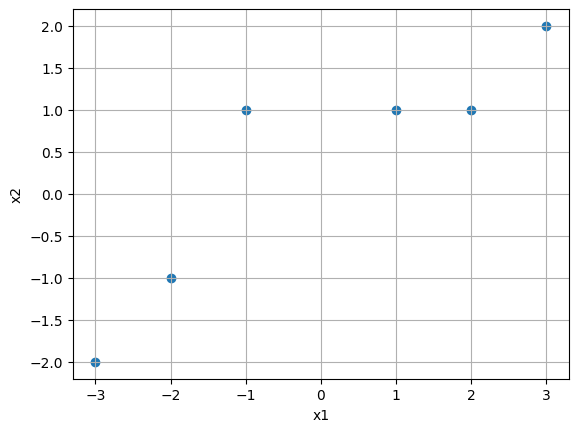

In [ ]:
# feature space 에서 데이터 분포

plt.scatter(x[:,0],x[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

In [ ]:
# 비지도 학습(pc score)>>fit transform
z = pca.transform(x)
# 원본데이터를 주성분 공간으로 변환

In [ ]:
z

array([[ 0.50917706,  1.08866118],
       [ 2.40151069, -0.10258752],
       [ 3.7751606 , -0.43887001],
       [-1.20075534,  0.05129376],
       [-2.05572155, -0.46738995],
       [-3.42937146, -0.13110746]])

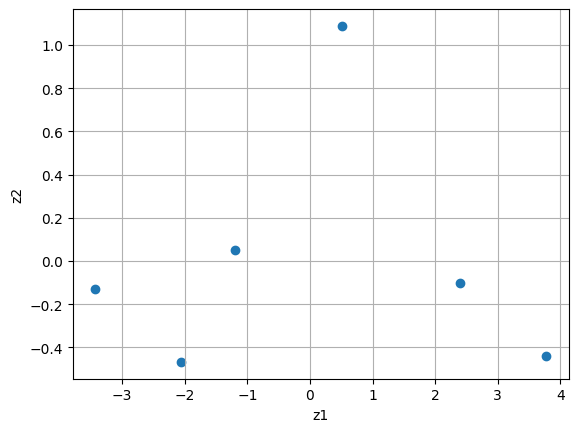

In [ ]:
# feature space에서 pca값(변환된 데이터)분포
plt.scatter(z[:,0],z[:,1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.grid()
plt.show()
# z1(pc1)이 z2(pc2)보다 더 큰 variance 가지고 있

In [ ]:
# PC loading 벡터

phi = pca.components_
phi
# 주성분 : 데이터의 변동성(variance) 설명하는 직교 성분(pc1, pc2)
# phi 결과 >> 주성분 행렬(각 행: 각 주성분, 각 열 : feature에 대한 주성분의 가중치)

array([[-0.8549662 , -0.51868371],
       [-0.51868371,  0.8549662 ]])

In [ ]:
phi[0]
# 첫번째 주성분(pc1)의 가중치 벡터
# -0.8549662(첫번째 feature에 대한 가중치) , -0.51868371(두번째 feature에 대한 가중치)
# >> 각 feature은 음(-)의 가중치를 가짐, 첫번째 feature가 더 큰 영향을 미침

array([-0.8549662 , -0.51868371])

In [ ]:
phi[1]
# 두번째 주성분(pc2)의 가중치 벡터
# -0.51868371(첫번째 feature에 대한 가중치) , 0.8549662(두번째 feature에 대한 가중치)
# >> 첫번째 feature은 음(-)의 가중치를 가짐, 두번째 feature는 양의 가중치를 가지고, 더 큰 영향을 미침

array([-0.51868371,  0.8549662 ])

In [ ]:
# Z
np.matmul(x, phi.T)
# pca에서 직교 분석
# PCA 수행 후, 주성분으로 데이터 변환
# 원본데이터 X >> 주성분공간(phi)으로 투사(projection)하여 차원을 축소
# [ 0.33628249,  1.37364991] >> 원본 데이터 x의 첫번째 행[-1,1]값이 주성분 공간 phi로 변환된 좌

array([[ 0.33628249,  1.37364991],
       [ 2.22861612,  0.18240122],
       [ 3.60226603, -0.15388128],
       [-1.37364991,  0.33628249],
       [-2.22861612, -0.18240122],
       [-3.60226603,  0.15388128]])

In [ ]:
# PVE(proportion of variance explained)
# 각 주성분이 설명하는 variance의 비율
pca.explained_variance_ratio_
# 첫번째 pc1이 95.86% 설명, 두번째 pc2가 4.1%설면

array([0.95864607, 0.04135393])

In [ ]:
x_iris = load_iris().data
y_iris = load_iris().target

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(x_iris)

PCA(n_components=3)

In [ ]:
x_iris[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

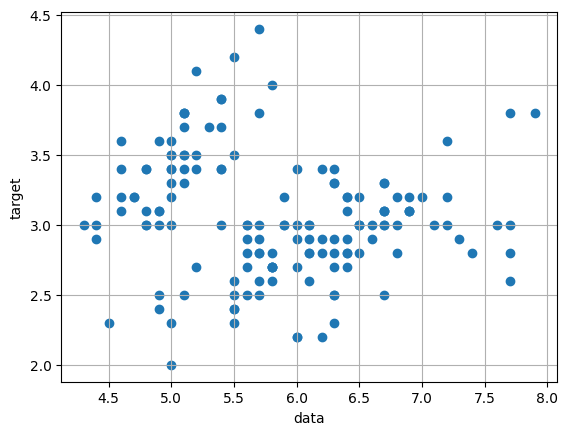

In [ ]:
# 원본데이터 분포

plt.scatter(x_iris[:,0],x_iris[:,1])
plt.xlabel('data')
plt.ylabel('target')
plt.grid()
plt.show()

In [ ]:
# 비지도 학습(pc score)>>fit transform
z = pca.transform(x_iris)
# 원본데이터를 주성분 공간으로 변환

In [ ]:
z[:3]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026]])

In [ ]:
phi =  pca.components_

In [ ]:
x_iris.shape
# 원데이터의 독립변수(4개)

(150, 4)

In [ ]:
# np.matmul(x_iris, phi.T)
np.matmul(x_iris, phi.T).shape

(150, 3)

In [ ]:
# (**)설명된 분산
pca.explained_variance_ratio_
# pc1 : 92.46%설명, pc2 : 5.3% >> 97.7%

array([0.92461872, 0.05306648, 0.01710261])

In [ ]:
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.grid()
plt.show()

pca 주성분 요인 2개로 선정

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(x_iris)

PCA(n_components=2)

In [ ]:
# (**)설명된 분산
pca.explained_variance_ratio_
# pc1 : 92.46%설명, pc2 : 5.3% >> 97.7%

array([0.92461872, 0.05306648])

KMeans clustering 간단한 예제

In [ ]:
x = np.array([[1],[1],[1],[0,],[0,],[0,]])

In [ ]:
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

In [ ]:
# 적합(fitting)

kmeans = KMeans(n_clusters=2, randomstate = 42).fit(x)

KMeans clustering 예제_iris

In [ ]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

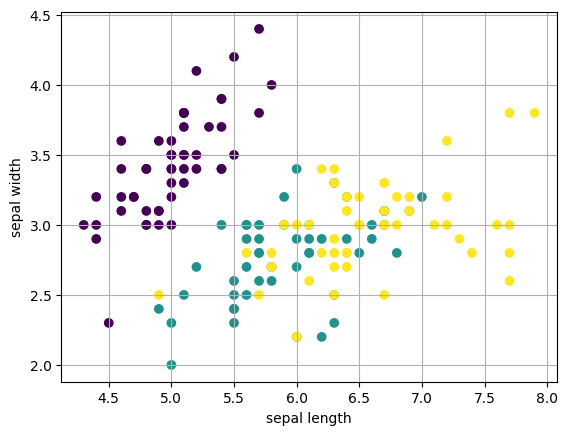

In [ ]:
plt.scatter(x_iris[:,0], x_iris[:,1], c=y_iris)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.show()

In [ ]:
# 적합(fitting)
KMeans(n_clusters = 2, random_state=42 ).fit(x_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans.labels_

NameError: name 'kmeans' is not defined

In [ ]:
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=kmeans.labels_)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.grid()
plt.show()

NameError: name 'kmeans' is not defined